#  Google Play Store App Rating Models & Predictions

<div style="text-align: center;" style="border: 2px solid black;">
    <img src="image/apps.png" alt="Google Play Store">
</div>

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

# Column Transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Assuming you have already imported roc_curve and auc functions
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


## Authors and Contact Information

- [Goknur Kaya](https://www.linkedin.com/in/goknurk/)

## Overview

This initiative focuses on creating a new app under the auspices of a major multinational corporation, with sponsorship from the Business Intelligence & Data Science (BIDS) division. With substantial investments backing this project, senior management is keenly interested in understanding the correlation between user ratings and intrinsic elements such as pricing, downloads, and more. The development team is set to collaborate closely with the data team to steer the project towards a successful end product. This entails integrating crucial app rating factors with the company's established development standards and principles.

## Business Problem 
Google stands as one of the most influential tech companies today, and its dedicated marketplace for digital app purchases on the Android platform, known as the Google Play Store, was initially introduced in 2008. As of the first quarter of 2021, the Google Play Store boasted an impressive collection of 3.5 million apps. Within this extensive catalog, user ratings within the store are considered pivotal factors influencing the decision to download a particular app. As a globally expansive firm, we are keen on understanding both the qualitative and quantitative impacts of various features on achieving high user ratings to guide our in-house development. This necessitates a comprehensive analysis of current app ratings. In addition to identifying meaningful features and their influence on high user ratings, we are actively seeking an appropriate predictive model to ascertain ratings falling within the categories of Low, Medium, and High.

## Data Understanding and Analysis
The dataset utilized originates from Kaggle, specifically the Google Play Store Dataset, which encompasses 24 columns such as category, rating, installs, content rating, ad supported, editors' choice, and more. Covering the period from 2010 to 2021, the original dataset comprises over 3 million entries.

During the data cleaning phase, we removed entries with a rating of 0, signifying apps that had not been rated by any users. Given computational constraints, our modeling efforts were directed toward a subset of 15,000 data points. Additionally, a rating class column was created to classify ratings into 'Low,' 'Medium,' and 'High' categories based on their distribution:

- Low Rating: 1-3.8
- Medium Rating: 3.8-4.2
- High Rating: 4.2-5
Several limitations were encountered in the process, including the absence of information on app prices, in-game ad display durations, insufficient data on in-app purchases, and the presence of imbalanced ratings.

## Exploratory Data Analysis

In [2]:
google= pd.read_csv("data/Google-Playstore.csv")
google

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
google['Free'].value_counts()

True     2267876
False      45068
Name: Free, dtype: int64

In [5]:
# dropping rating 0 since we do not know if it is actually rated 0 or if it is rated at all
google = google[google['Rating'] != 0.0]
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253182 entries, 1 to 2312943
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1253180 non-null  object 
 1   App Id             1253182 non-null  object 
 2   Category           1253182 non-null  object 
 3   Rating             1230299 non-null  float64
 4   Rating Count       1230299 non-null  float64
 5   Installs           1253075 non-null  object 
 6   Minimum Installs   1253075 non-null  float64
 7   Maximum Installs   1253182 non-null  int64  
 8   Free               1253182 non-null  bool   
 9   Price              1253182 non-null  float64
 10  Currency           1253054 non-null  object 
 11  Size               1252986 non-null  object 
 12  Minimum Android    1250683 non-null  object 
 13  Developer Id       1253167 non-null  object 
 14  Developer Website  873316 non-null   object 
 15  Developer Email    1253157 non-n

In [6]:
google['Rating'].value_counts()

5.0    100122
4.2     87993
4.4     86304
4.3     83276
4.6     78302
4.5     76753
4.1     69723
4.0     67342
4.7     62205
4.8     61109
3.9     55684
3.8     53863
4.9     44524
3.7     43300
3.6     35989
3.5     31636
3.4     28908
3.3     22613
3.2     21485
3.0     17275
3.1     15539
2.8     12235
2.9     11522
2.6      9213
2.7      9200
2.5      6942
2.4      6051
2.3      5414
2.2      4954
2.0      3804
2.1      3675
1.8      2957
1.9      2588
1.7      1928
1.6      1644
1.5      1157
1.4      1011
1.0       713
1.3       579
1.2       531
1.1       236
Name: Rating, dtype: int64

In [7]:
google = pd.DataFrame(google)

# Set display options to show all numbers without scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Display summary statistics
summary_stats = google.describe()
print(summary_stats)

              Rating     Rating Count   Minimum Installs   Maximum Installs  \
count 1230299.000000   1230299.000000     1253075.000000     1253182.000000   
mean        4.100915      5332.570199      338066.821648      590070.874151   
std         0.689101    289436.257332    20555939.125713    31998081.938886   
min         1.000000         5.000000           0.000000           0.000000   
25%         3.800000        12.000000        1000.000000        1184.000000   
50%         4.200000        35.000000        5000.000000        5397.000000   
75%         4.600000       178.000000       10000.000000       32394.000000   
max         5.000000 138557570.000000 10000000000.000000 12057627016.000000   

               Price  
count 1253182.000000  
mean        0.092616  
std         1.860907  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       399.990000  


In [8]:
google['Category'].value_counts()

Education                  129562
Tools                       87066
Entertainment               84273
Music & Audio               80500
Books & Reference           67274
Personalization             58009
Lifestyle                   55792
Business                    52119
Finance                     39755
Productivity                39211
Health & Fitness            34294
Shopping                    33317
Puzzle                      32838
Travel & Local              32365
Arcade                      31400
Casual                      30525
Sports                      27224
Social                      25933
News & Magazines            25729
Communication               25277
Food & Drink                23372
Photography                 23011
Simulation                  19688
Action                      18841
Adventure                   16149
Maps & Navigation           15409
Medical                     14810
Educational                 12660
Video Players & Editors     10683
Auto & Vehicle

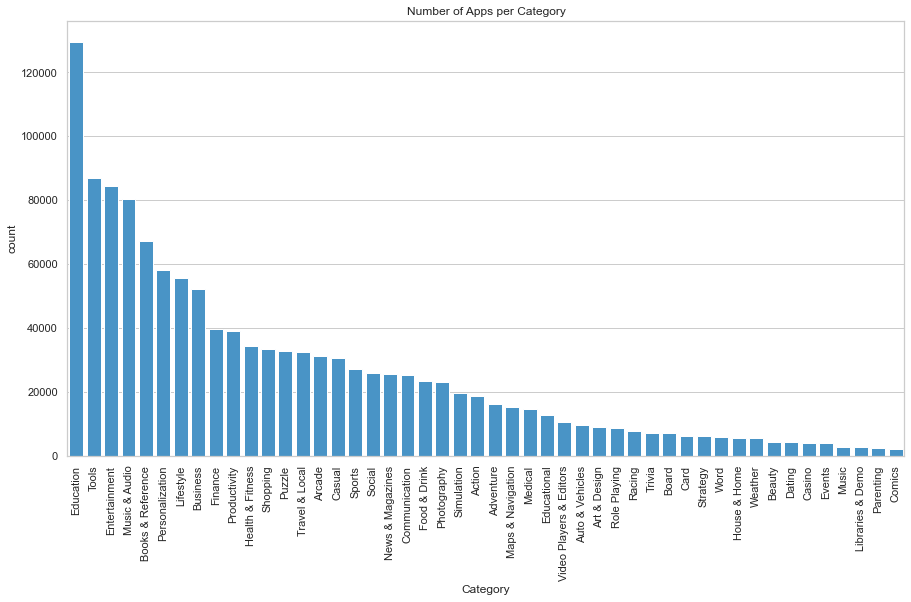

In [9]:
# Set the color to a specific shade of blue
blue_color = '#3498db'  # You can replace this with your desired blue color code

# Plotting the countplot with the specified blue color
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")
sns.countplot(x='Category', data=google, order=google['Category'].value_counts().index, color=blue_color)
plt.xticks(rotation=90)
plt.title('Number of Apps per Category')
plt.show()


In [10]:
print('Average Rating per Category')
google.groupby('Category')['Rating'].agg(['mean','median'])

Average Rating per Category


,mean,median
Category,,
Action,4.007801,4.000000
Adventure,4.077112,4.100000
Arcade,4.260515,4.300000
Art & Design,3.979133,4.100000
Auto & Vehicles,3.890104,4.000000
Beauty,4.059424,4.200000
Board,4.068230,4.100000
Books & Reference,4.287158,4.400000
Business,4.050910,4.200000


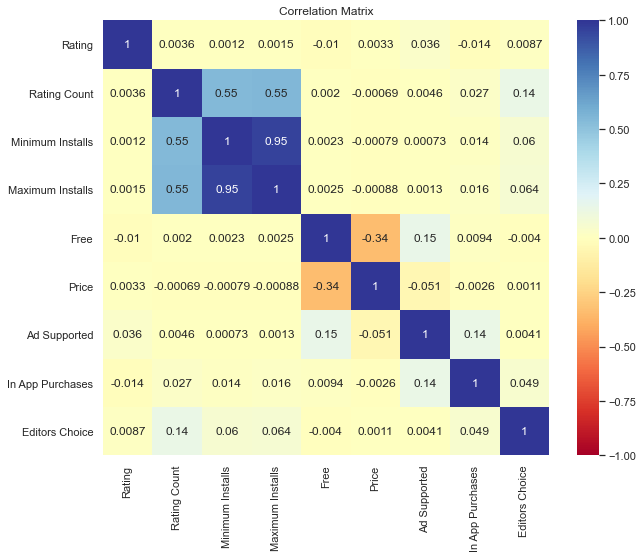

In [11]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(google.corr(), vmin=-1, cmap='RdYlBu', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
google.nunique()

App Name             1192519
App Id               1253182
Category                  48
Rating                    41
Rating Count           38481
Installs                  22
Minimum Installs          22
Maximum Installs      250093
Free                       2
Price                    736
Currency                  12
Size                    1622
Minimum Android          135
Developer Id          498071
Developer Website     488511
Developer Email       589891
Released                4157
Last Updated            3888
Content Rating             6
Privacy Policy        585497
Ad Supported               2
In App Purchases           2
Editors Choice             2
Scraped Time           67348
dtype: int64

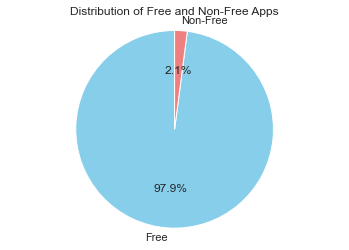

In [14]:

free_counts = google['Free'].value_counts()

# Data for the pie chart
labels = ['Free', 'Non-Free']
sizes = [free_counts[True], free_counts[False]]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Free and Non-Free Apps')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

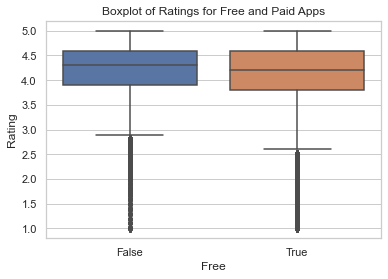

In [15]:
# Create a boxplot to visualize the distribution of ratings for Free and Paid apps in the 'google' dataset.
sns.boxplot(x="Free", y="Rating", data=google)

# Set the title for the plot
plt.title("Boxplot of Ratings for Free and Paid Apps")

# Display the plot
plt.show()


The average rating of paid apps is slightly higher

In [16]:
google['Editors Choice'].value_counts(normalize=True)

False   0.999319
True    0.000681
Name: Editors Choice, dtype: float64

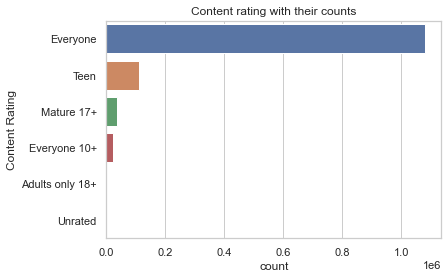

In [31]:
# Create a countplot to display the distribution of content ratings in the 'google' dataset.
sns.countplot(y="Content Rating", data=google)

# Set the title for the plot
plt.title("Content Rating with Their Counts")

# Save the figure as a JPEG file in the specified directory
plt.savefig('./image/content rating.jpeg')

# Display the plot
plt.show()

# Handling Missing Values

In [32]:
google.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                128
Size                    196
Minimum Android        2499
Developer Id             15
Developer Website    379866
Developer Email          25
Released              49617
Last Updated              0
Content Rating            0
Privacy Policy       211040
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [33]:
google['Ad Supported'].value_counts()

True     712139
False    541043
Name: Ad Supported, dtype: int64

In [34]:
google['Released'].value_counts().sort_index()

2010-01-28     5
2010-01-29     5
2010-01-30     8
2010-01-31     8
2010-02-01     8
              ..
2021-06-11    26
2021-06-12     5
2021-06-13     3
2021-06-14     7
2021-06-15     4
Name: Released, Length: 4157, dtype: int64

In [35]:

# Create a copy of the DataFrame with the specified columns dropped
df = google.drop(['Developer Website', 'Privacy Policy', 'App Id', 'Price'], axis=1)

# Check missing values in the modified DataFrame
df.isnull().sum()

App Name                2
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Currency              128
Size                  196
Minimum Android      2499
Developer Id           15
Developer Email        25
Released            49617
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

In [36]:
df['Size'].value_counts()

Varies with device    61286
11M                   32765
12M                   29426
13M                   25969
14M                   24170
                      ...  
866M                      1
431M                      1
514M                      1
10.0k                     1
581M                      1
Name: Size, Length: 1622, dtype: int64

In [37]:
# Drop missing values from the DataFrame 'df'
df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("Shape of the DataFrame after dropping missing values:", df.shape)

Shape of the DataFrame after dropping missing values: (1200878, 20)


In [38]:
df.isna().sum()

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Currency            0
Size                0
Minimum Android     0
Developer Id        0
Developer Email     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200878 entries, 1 to 2312943
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1200878 non-null  object        
 1   Category          1200878 non-null  object        
 2   Rating            1200878 non-null  float64       
 3   Rating Count      1200878 non-null  float64       
 4   Installs          1200878 non-null  object        
 5   Minimum Installs  1200878 non-null  float64       
 6   Maximum Installs  1200878 non-null  int64         
 7   Free              1200878 non-null  bool          
 8   Currency          1200878 non-null  object        
 9   Size              1200878 non-null  object        
 10  Minimum Android   1200878 non-null  object        
 11  Developer Id      1200878 non-null  object        
 12  Developer Email   1200878 non-null  object        
 13  Released          1200878 non-null  dateti

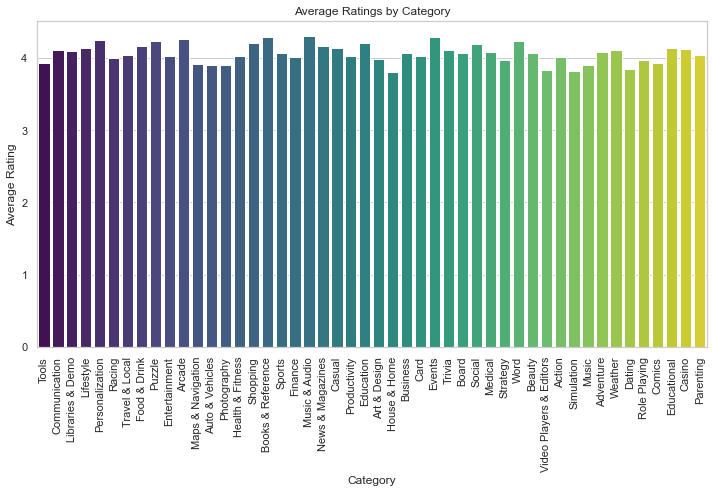

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a barplot to visualize the average ratings by category in the 'df' dataset
sns.barplot(x='Category', y='Rating', data=df, ci=None, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title, ylabel, and xlabel for the plot
plt.title('Average Ratings by Category')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.show()

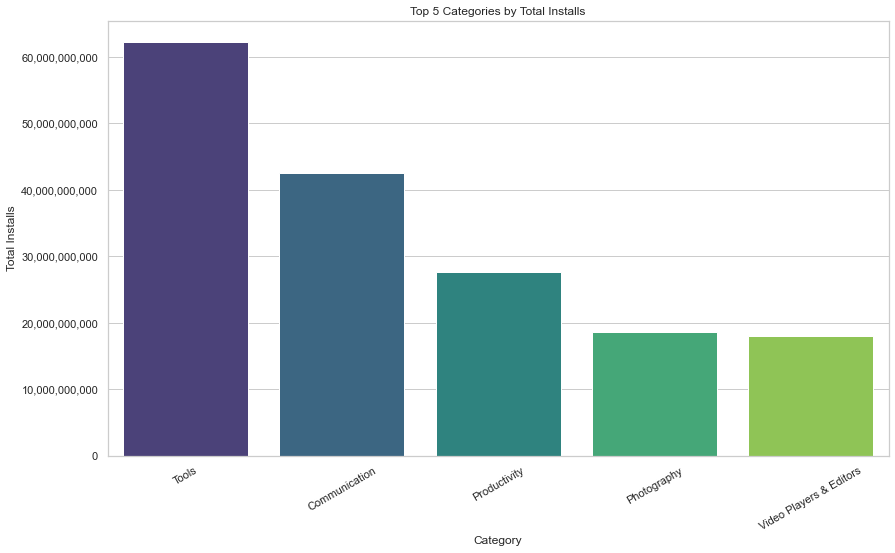

In [41]:
from matplotlib.ticker import FuncFormatter

#If 'Installs' is not in string format, you can skip the following line
df['Installs'] = df['Installs'].str.replace(',', '').str.rstrip('+').astype('int64')

# Calculate the total installs for each category
total_installs_per_category = df.groupby('Category')['Installs'].sum().reset_index()

# Sort the DataFrame by total installs in descending order
total_installs_per_category.sort_values(by='Installs', ascending=False, inplace=True)

# Select the top 20 categories
top_5_categories = total_installs_per_category.head(5)

# Create a bar plot for the top 20 categories
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Category', y='Installs', data=top_5_categories, palette='viridis')
plt.xticks(rotation=30)
plt.title('Top 5 Categories by Total Installs')
plt.ylabel('Total Installs')
plt.xlabel('Category')

# Format y-axis labels to display as integers
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

# Save the figure after displaying the plot
plt.savefig('./image/top_5_categories_by_total_installs.jpeg')
plt.show()

In [ ]:
df['Size']

1          2.9M
3          1.8M
6          2.5M
7           16M
9          3.5M
           ... 
2312932     37M
2312933    4.1M
2312938     10M
2312942     10M
2312943    5.2M
Name: Size, Length: 1200878, dtype: object

In [ ]:
df['Size'] = df['Size'].str.replace('M', '').replace('Varies with device', np.nan)
df.isna().sum()

App Name                0
Category                0
Rating                  0
Rating Count            0
Installs                0
Minimum Installs        0
Maximum Installs        0
Free                    0
Currency                0
Size                38104
Minimum Android         0
Developer Id            0
Developer Email         0
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
Year                    0
dtype: int64

In [ ]:
df = df.dropna(subset=['Size'])
df.isna().sum()

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Currency            0
Size                0
Minimum Android     0
Developer Id        0
Developer Email     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
Year                0
dtype: int64

In [ ]:
# Convert the 'Size' column in the DataFrame 'df' to numeric values, rounding to two decimal places
df['Size'] = pd.to_numeric(df['Size'], errors='coerce').round(2)
# Display information about the DataFrame, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162774 entries, 1 to 2312943
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1162774 non-null  object        
 1   Category          1162774 non-null  object        
 2   Rating            1162774 non-null  float64       
 3   Rating Count      1162774 non-null  float64       
 4   Installs          1162774 non-null  int64         
 5   Minimum Installs  1162774 non-null  float64       
 6   Maximum Installs  1162774 non-null  int64         
 7   Free              1162774 non-null  bool          
 8   Currency          1162774 non-null  object        
 9   Size              1142646 non-null  float64       
 10  Minimum Android   1162774 non-null  object        
 11  Developer Id      1162774 non-null  object        
 12  Developer Email   1162774 non-null  object        
 13  Released          1162774 non-null  dateti

In [47]:
df.isna().sum()

App Name                0
Category                0
Rating                  0
Rating Count            0
Installs                0
Minimum Installs        0
Maximum Installs        0
Free                    0
Currency                0
Size                20128
Minimum Android         0
Developer Id            0
Developer Email         0
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
Year                    0
dtype: int64

# Visualizations 

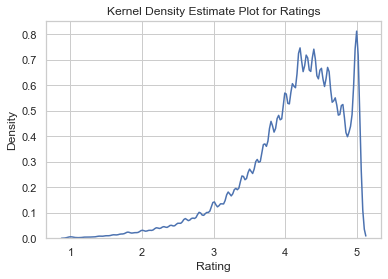

In [48]:
# Create a Kernel Density Estimate (KDE) plot for the 'Rating' column in the DataFrame 'df'
sns.kdeplot(df['Rating'])
# Set the title, xlabel for the plot
plt.title('Kernel Density Estimate Plot for Ratings')
plt.xlabel('Rating')
plt.show()

In [49]:
import plotly.graph_objects as go
from plotly.offline import iplot

col = 'Rating'

# Filter the DataFrame to include only free apps
free_apps_df = df[df['Free'] == True]

# Count the values and calculate percentages for free apps
v1 = free_apps_df[col].value_counts().reset_index()
v1 = v1.rename(columns={col: 'count', 'index': col})
v1['percent'] = v1['count'].apply(lambda x: 100 * x / sum(v1['count']))

# Create a bar plot using plotly for free apps
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Rating", marker=dict())
layout = {'title': "Free App Ratings", 'xaxis': {'title': "Ratings"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


In [50]:

col = 'Rating'

# Filter the DataFrame to include only non-free (paid) apps
non_free_apps_df = df[df['Free'] == False]

# Count the values and calculate percentages for non-free apps
v2 = non_free_apps_df[col].value_counts().reset_index()
v2 = v2.rename(columns={col: 'count', 'index': col})
v2['percent'] = v2['count'].apply(lambda x: 100 * x / sum(v2['count']))

# Create a bar plot using plotly for non-free apps
trace2 = go.Bar(x=v2[col], y=v2["count"], name="Rating", marker=dict(color="#6ad49b"))
layout = {'title': "Paid App Ratings", 'xaxis': {'title': "Ratings"}}
fig = go.Figure(data=[trace2], layout=layout)
iplot(fig)



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162774 entries, 1 to 2312943
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1162774 non-null  object        
 1   Category          1162774 non-null  object        
 2   Rating            1162774 non-null  float64       
 3   Rating Count      1162774 non-null  float64       
 4   Installs          1162774 non-null  int64         
 5   Minimum Installs  1162774 non-null  float64       
 6   Maximum Installs  1162774 non-null  int64         
 7   Free              1162774 non-null  bool          
 8   Currency          1162774 non-null  object        
 9   Size              1142646 non-null  float64       
 10  Minimum Android   1162774 non-null  object        
 11  Developer Id      1162774 non-null  object        
 12  Developer Email   1162774 non-null  object        
 13  Released          1162774 non-null  dateti

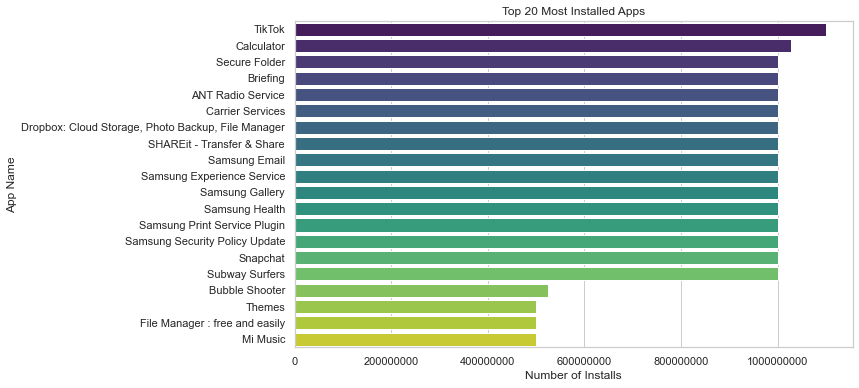

In [52]:
top_20_apps = df.groupby('App Name')['Installs'].sum().nlargest(20)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_20_apps.values, y=top_20_apps.index, palette='viridis')

# Disable scientific notation on the x-axis
plt.ticklabel_format(style='plain', axis='x')

plt.title('Top 20 Most Installed Apps')
plt.xlabel('Number of Installs')
plt.ylabel('App Name')
plt.show()



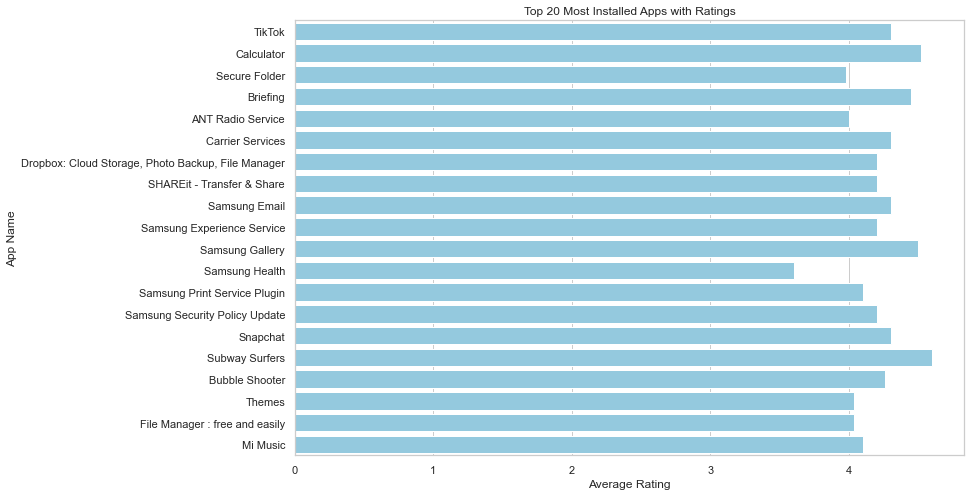

In [53]:

top_20_apps = df.groupby('App Name').agg({'Installs': 'sum', 'Rating': 'mean'}).nlargest(20, 'Installs')

# Plotting
plt.figure(figsize=(12, 8))

# Plot ratings on the x-axis
sns.barplot(x=top_20_apps['Rating'], y=top_20_apps.index, color='skyblue')
 
# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('App Name')
plt.title('Top 20 Most Installed Apps with Ratings')

# Show the plot
plt.show()



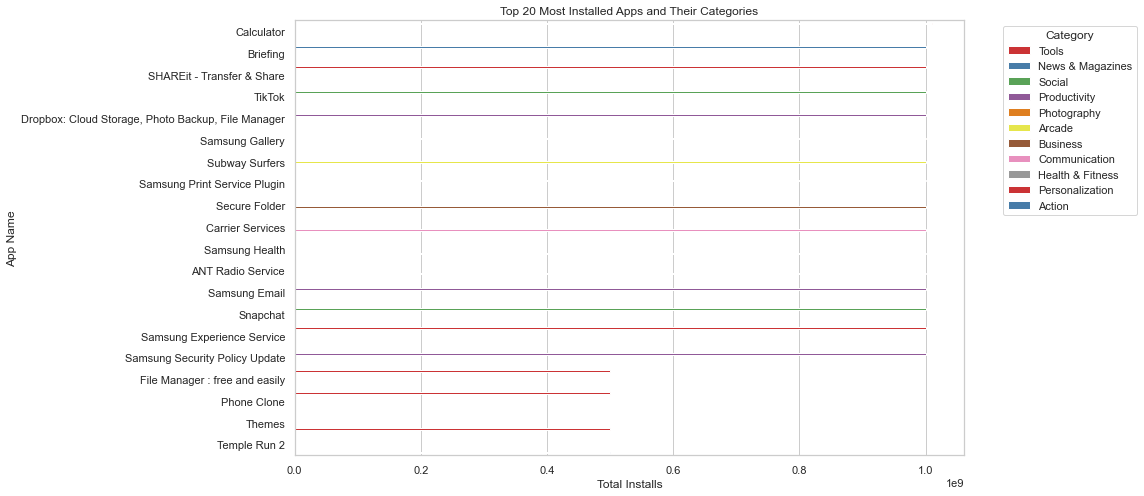

,App Name,Category,Installs
0,Calculator,Tools,1010673810
1,Briefing,News & Magazines,1000001000
2,SHAREit - Transfer & Share,Tools,1000000000
3,TikTok,Social,1000000000
4,"Dropbox: Cloud Storage, Photo Backup, File Manager",Productivity,1000000000
5,Samsung Gallery,Photography,1000000000
6,Subway Surfers,Arcade,1000000000
7,Samsung Print Service Plugin,Productivity,1000000000
8,Secure Folder,Business,1000000000
9,Carrier Services,Communication,1000000000


In [54]:
top_apps = df.groupby(['App Name', 'Category']).agg({'Installs': 'sum'}).sort_values(by='Installs', ascending=False).head(20)

# Reset index for better plotting
top_apps.reset_index(inplace=True)

# Set a categorical color palette for each category
category_palette = sns.color_palette("Set1", n_colors=len(top_apps['Category'].unique()))

# Plotting
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Installs', y='App Name', hue='Category', data=top_apps, palette=category_palette, dodge=True)
plt.title('Top 20 Most Installed Apps and Their Categories')
plt.xlabel('Total Installs')
plt.ylabel('App Name')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an image (optional)
plt.savefig('top_apps_bar_chart.png', bbox_inches='tight')

plt.show()

# Display the result in a pandas table
table_result = top_apps[['App Name', 'Category', 'Installs']]
table_result.style.bar(subset=['Installs'], color='#5fba7d', vmin=0, vmax=max(top_apps['Installs']), align='left')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162774 entries, 1 to 2312943
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1162774 non-null  object        
 1   Category          1162774 non-null  object        
 2   Rating            1162774 non-null  float64       
 3   Rating Count      1162774 non-null  float64       
 4   Installs          1162774 non-null  int64         
 5   Minimum Installs  1162774 non-null  float64       
 6   Maximum Installs  1162774 non-null  int64         
 7   Free              1162774 non-null  bool          
 8   Currency          1162774 non-null  object        
 9   Size              1142646 non-null  float64       
 10  Minimum Android   1162774 non-null  object        
 11  Developer Id      1162774 non-null  object        
 12  Developer Email   1162774 non-null  object        
 13  Released          1162774 non-null  dateti

In [56]:
df['Released'].value_counts()

2020-05-13    902
2020-06-16    902
2020-06-01    901
2020-05-19    888
2020-05-20    882
             ... 
2010-02-28      2
2010-02-14      2
2010-06-16      1
2010-04-10      1
2010-04-05      1
Name: Released, Length: 4157, dtype: int64

# MODELING

In [57]:
# Create a function to classify ratings
def classify_rating(rating):
    if rating >= 1 and rating < 3.8:
        return 'Low'
    elif rating >= 3.8 and rating < 4.2:
        return 'Medium'
    elif rating >= 4.2 and rating <= 5:
        return 'High'
    else:
        return 'Unknown'

# Apply the function to create a new 'Rating_Class' column
df['Rating_Class'] = df['Rating'].apply(classify_rating)

# Display the updated DataFrame
print(df[['Rating', 'Rating_Class']])

          Rating Rating_Class
1       4.400000         High
3       5.000000         High
6       4.500000         High
7       2.000000          Low
9       4.700000         High
...          ...          ...
2312932 4.300000         High
2312933 4.000000       Medium
2312938 3.400000          Low
2312942 3.500000          Low
2312943 5.000000         High

[1162774 rows x 2 columns]


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162774 entries, 1 to 2312943
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1162774 non-null  object        
 1   Category          1162774 non-null  object        
 2   Rating            1162774 non-null  float64       
 3   Rating Count      1162774 non-null  float64       
 4   Installs          1162774 non-null  int64         
 5   Minimum Installs  1162774 non-null  float64       
 6   Maximum Installs  1162774 non-null  int64         
 7   Free              1162774 non-null  bool          
 8   Currency          1162774 non-null  object        
 9   Size              1142646 non-null  float64       
 10  Minimum Android   1162774 non-null  object        
 11  Developer Id      1162774 non-null  object        
 12  Developer Email   1162774 non-null  object        
 13  Released          1162774 non-null  dateti

### Due to computational constraints, I had to work with only 1% of the data. This selection was made through random sampling.

In [59]:
# Use the sample method to randomly select 1 percent of the data
percent_to_select = 0.01
sampled = df.sample(frac=percent_to_select, random_state=42)  # Use a specific random state for reproducibility

In [60]:
sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11628 entries, 278353 to 1542838
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App Name          11628 non-null  object        
 1   Category          11628 non-null  object        
 2   Rating            11628 non-null  float64       
 3   Rating Count      11628 non-null  float64       
 4   Installs          11628 non-null  int64         
 5   Minimum Installs  11628 non-null  float64       
 6   Maximum Installs  11628 non-null  int64         
 7   Free              11628 non-null  bool          
 8   Currency          11628 non-null  object        
 9   Size              11430 non-null  float64       
 10  Minimum Android   11628 non-null  object        
 11  Developer Id      11628 non-null  object        
 12  Developer Email   11628 non-null  object        
 13  Released          11628 non-null  datetime64[ns]
 14  Last Updated   

In [61]:
# Drop rows with missing values in the 'Size' column
sampled= sampled.dropna(subset=['Size'])
sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430 entries, 278353 to 1542838
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App Name          11430 non-null  object        
 1   Category          11430 non-null  object        
 2   Rating            11430 non-null  float64       
 3   Rating Count      11430 non-null  float64       
 4   Installs          11430 non-null  int64         
 5   Minimum Installs  11430 non-null  float64       
 6   Maximum Installs  11430 non-null  int64         
 7   Free              11430 non-null  bool          
 8   Currency          11430 non-null  object        
 9   Size              11430 non-null  float64       
 10  Minimum Android   11430 non-null  object        
 11  Developer Id      11430 non-null  object        
 12  Developer Email   11430 non-null  object        
 13  Released          11430 non-null  datetime64[ns]
 14  Last Updated   

In [62]:
sampled['Content Rating']

278353         Everyone
1477722        Everyone
2152540    Everyone 10+
1355187        Everyone
1281375        Everyone
               ...     
2293837      Mature 17+
1737110        Everyone
2014266        Everyone
1925125        Everyone
1542838        Everyone
Name: Content Rating, Length: 11430, dtype: object

In [63]:
# Save cleaned dataset as CSV
sampled.to_csv('data/google_df.csv')

# Baseline Model

## KNN Classifier

In [64]:
# Handle boolean values (convert to 0 and 1)
sampled['Free'] = sampled['Free'].astype(int)
sampled['Ad Supported'] = sampled['Ad Supported'].astype(int)
sampled['In App Purchases'] = sampled['In App Purchases'].astype(int)
sampled['Editors Choice'] = sampled['Editors Choice'].astype(int)

In [65]:
selected_data = sampled[['Category', 'Free', 'Installs', 'Editors Choice', 'Rating_Class']]

# Separate features and target variable
X = selected_data.drop('Rating_Class', axis=1)
y = selected_data['Rating_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define categorical and numerical features
categorical_features = ['Category', 'Free', 'Editors Choice']
numerical_features = ['Installs']


# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and k-NN classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.84      0.70      1892
         Low       0.35      0.19      0.25       825
      Medium       0.29      0.13      0.18       712

    accuracy                           0.54      3429
   macro avg       0.41      0.39      0.37      3429
weighted avg       0.47      0.54      0.48      3429



##### The classification model achieved an accuracy of 54%, with varying precision, recall, and F1-score values for each class. Notably, the 'High' class exhibited better performance compared to 'Low' and 'Medium' classes, as indicated by higher precision and recall values

In [66]:
# Transform the features using the fitted pipeline
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Check the number of columns in the transformed features
num_columns_after_one_hot_encode = X_train_transformed.shape[1]

print(f"Number of columns after one-hot encoding: {num_columns_after_one_hot_encode}")

Number of columns after one-hot encoding: 53


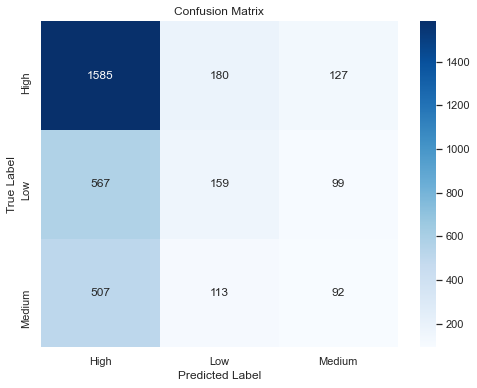

In [67]:
# The predictions are stored in 'y_pred'
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline.named_steps['classifier'].classes_,
            yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [68]:
from sklearn.inspection import permutation_importance
# Calculate Permutation Importance
perm_importance = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores
feature_importance_scores = perm_importance.importances_mean

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance_scores):
    print(f"{feature}: {importance:.4f}")

Feature Importance:
Category: 0.0344
Free: -0.0022
Installs: 0.0340
Editors Choice: 0.0000


##### These scores represent the contribution of each feature to the model's predictive performance. Positive values indicate a positive impact, while negative values suggest a negative impact. In this context, 'Category' and 'Installs' seem to have a positive influence, while 'Free' has a slight negative impact. 'Editors Choice' appears to have no impact based on a score of 0.0000.

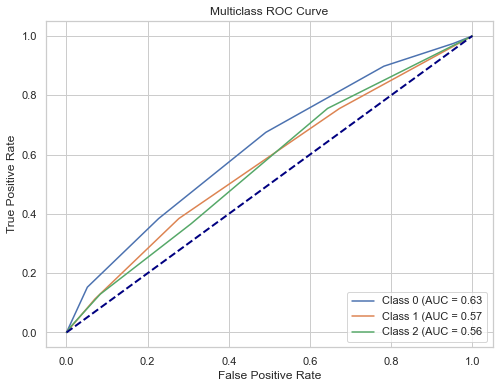

In [69]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Calculate AUC for the overall model on the training set
y_proba_train = pipeline.predict_proba(X_train)
auc_overall_train = roc_auc_score(y_train_encoded, y_proba_train, multi_class='ovr')

# Transform the test set labels using the same encoder
y_test_encoded = label_encoder.transform(y_test)

# Calculate AUC for the overall model on the test set
y_proba_test = pipeline.predict_proba(X_test)
auc_overall_test = roc_auc_score(y_test_encoded, y_proba_test, multi_class='ovr')

# Compute ROC curve and AUC for each class on the test set
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y.nunique()):
    fpr[i], tpr[i], _ = roc_curve((y_test_encoded == i).astype(int), y_proba_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(y.nunique()):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


### XG Boost Classifier

In [70]:

from xgboost import XGBClassifier

# Drop columns that are not needed for modeling
df_model_xg = sampled.drop(['Minimum Android', 'Rating', 'Rating Count', 'Developer Id', 'Developer Email', 'Last Updated', 'Scraped Time', 'Minimum Installs', 'Maximum Installs'], axis=1)

# Drop rows with missing values in the 'Size' column
df_model_xg = df_model_xg.dropna(subset=['Size'])

# Split the data into features (X) and target variable (y)
X = df_model_xg.drop('Rating_Class', axis=1)
y = df_model_xg['Rating_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define categorical and numerical features
categorical_features_xg = ['App Name', 'Category', 'Currency','Free', 'Ad Supported', 'Editors Choice', 'Content Rating']
numerical_features_xg = ['Size', 'Installs']

# Use ColumnTransformer to apply different transformations to numerical and categorical features
preprocessor_xg = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_xg),  # 'passthrough' to keep numerical features as they are
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='error'), categorical_features_xg)
    ]
)

# Define a simpler XGBoost model
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)

# Create a pipeline with preprocessing and modeling steps
pipeline_xg = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', xgb_model)])

# Train the model
pipeline_xg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_xg.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.98      0.72      1892
         Low       0.43      0.04      0.07       825
      Medium       0.33      0.04      0.07       712

    accuracy                           0.56      3429
   macro avg       0.44      0.35      0.28      3429
weighted avg       0.48      0.56      0.43      3429



##### The model achieved an accuracy of 56%, with varying precision, recall, and F1-score values for each class. The 'High' class performed relatively well, while the 'Low' and 'Medium' classes exhibited lower recall and F1-score values. The overall model evaluation suggests moderate performance on the given dataset.

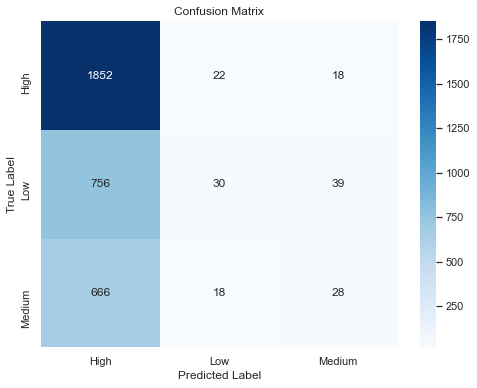

In [71]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline.named_steps['classifier'].classes_,
            yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Importance for XGBC 

In [72]:
# Get feature importance
feature_importance = pipeline_xg.named_steps['classifier'].feature_importances_

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Feature Importance:
App Name: 0.0465
Category: 0.0278
Installs: 0.0138
Free: 0.0100
Currency: 0.0283
Size: 0.0190
Released: 0.0046
Content Rating: 0.0174
Ad Supported: 0.0914
In App Purchases: 0.0178
Editors Choice: 0.0046
Year: 0.0134


# Support Vector Machine

In [73]:
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

selected_columns = ['Content Rating', 'Category', 'Currency', 'Size', 'Installs', 'Free', 'Ad Supported', 'Editors Choice', 'Rating_Class']
df_selected = sampled[selected_columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Rating_Class', axis=1)
y = df_selected['Rating_Class']

# Define categorical and numerical features
categorical_features_svm = ['Category', 'Currency', 'Free', 'Ad Supported', 'Editors Choice', 'Content Rating']
numerical_features_svm = ['Size', 'Installs']

# Use ColumnTransformer to apply different transformations to numerical and categorical features
preprocessor_svm = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_svm),  # Standardize numerical features
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), categorical_features_svm)
    ]
)

# Define the SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Create a pipeline with preprocessing and modeling steps
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor_svm),
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('classifier', svm_model)
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline_svm, X, y, cv=5, scoring='accuracy')

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Perform cross-validated predictions
y_pred_cv = cross_val_predict(pipeline_svm, X, y, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred_cv))


Cross-validated Accuracy Scores: [0.55074366 0.55643045 0.55336833 0.55249344 0.55424322]
Mean Accuracy: 0.5534558180227471
Classification Report:
              precision    recall  f1-score   support

        High       0.56      0.97      0.71      6306
         Low       0.38      0.05      0.09      2766
      Medium       0.31      0.01      0.03      2358

    accuracy                           0.55     11430
   macro avg       0.42      0.35      0.28     11430
weighted avg       0.47      0.55      0.42     11430



## Logistic Regression 

In [84]:

selected_columns = ['Category', 'Installs', 'Free', 'Ad Supported', 'Editors Choice', 'Rating_Class']
df_selected = sampled[selected_columns]

# Split the data into features (X) and target variable (y)
X_selected = df_selected.drop('Rating_Class', axis=1)
y_selected = df_selected['Rating_Class']

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Define categorical and numerical columns
categorical_cols_selected = ['Category','Free', 'Ad Supported', 'Editors Choice']
numerical_cols_selected = ['Installs', ]

# Create a column transformer
preprocessor_selected = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_selected),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_selected)
    ]
)

# Create a pipeline with preprocessing and logistic regression
pipeline_selected = Pipeline([
    ('preprocessor', preprocessor_selected),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the model to the training data
pipeline_selected.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = pipeline_selected.predict(X_test_selected)

# Evaluate the model
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)

print(f"Accuracy: {accuracy_selected}")
print("Classification Report:")
print(classification_rep_selected)


Accuracy: 0.5625546806649169
Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.98      0.72      1277
         Low       0.44      0.04      0.07       552
      Medium       0.36      0.03      0.06       457

    accuracy                           0.56      2286
   macro avg       0.46      0.35      0.28      2286
weighted avg       0.50      0.56      0.43      2286



In [89]:
# Make predictions on the training data
y_pred3 = pipeline_selected.predict(X_train)

# Evaluate the model on the training data
report3 = classification_report(y_train, y_pred3)

print("Classification Report on Training Set:\n", report3)

Classification Report on Training Set:
               precision    recall  f1-score   support

        High       0.56      0.97      0.71      4414
         Low       0.40      0.05      0.09      1941
      Medium       0.38      0.04      0.07      1646

    accuracy                           0.56      8001
   macro avg       0.45      0.35      0.29      8001
weighted avg       0.49      0.56      0.43      8001



## Recommendations

**Ad Supported**:
Highlight the significance of Ad Supported status to strategically position advertisements within high-performing apps, aiming to maximize ad revenue on the Google Play Store.

**Installs**:
Stimulate installations through strategic promotions, prioritizing efforts that encourage app downloads. Utilize channels and tactics that effectively resonate with the target audience to enhance installation rates.

**Category**:
Implement audience-centric marketing strategies tailored to specific categories. Understand user preferences within each segment to craft more effective promotional campaigns.

**App Name**:
Ensure the app name is both search-friendly and memorable. This will facilitate easy discovery for users and leave a lasting impression, contributing to overall visibility and recognition.

## Future Insights:

**App Prices**:
Explore varied pricing tiers' impact on user acquisition and revenue. Investigate trends like freemium models for potential revenue optimization.

**In-App Purchases**:
Assess how in-app purchases affect user engagement and monetization, considering category-specific transaction trends.

**User Behavior and Spending Patterns**:
Analyze user preferences for app categories and pricing models, providing insights for targeted marketing and revenue enhancement.